1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody rank()). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou rank() je nutné použít metodu groupby().

In [118]:
import pandas

df_volby = pandas.read_csv("ukol_01-1976-2020-president.csv")
df_volby["Rank"] = df_volby.groupby(["year","state"])["candidatevotes"].rank(method="min", ascending=False)
# df_volby = df_volby.sort_values(["year","state","Rank"])
df_volby.head(15)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN,6.0
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER,7.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT,2.0
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN,3.0


2. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.

In [119]:
df_volby_vitez = df_volby[df_volby["Rank"] == 1]
df_volby_vitez.to_csv("ukol_01-prezident_vitez.csv")
df_volby_vitez

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,2020,VIRGINIA,VA,51,54,40,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2413568,4460524,20210113,NaN,DEMOCRAT,1.0
4256,2020,WASHINGTON,WA,53,91,73,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2369612,4087631,20210113,NaN,DEMOCRAT,1.0
4264,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN,1.0
4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT,1.0


3. Pomocí metody shift() přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.

In [120]:
df_volby_vitez = df_volby_vitez.sort_values(["state","year","Rank"])
df_volby_vitez = df_volby_vitez.reset_index()
df_volby_vitez["Previous_winner_party"] = df_volby_vitez["party_simplified"].shift(1)
df_volby_vitez

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,Previous_winner_party
0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,None
1,332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT
2,696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
3,1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
4,1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2722,2004,WYOMING,WY,56,83,68,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,167629,243861,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
608,3073,2008,WYOMING,WY,56,83,68,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,164958,254904,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
609,3388,2012,WYOMING,WY,56,83,68,US PRESIDENT,"ROMNEY, MITT",REPUBLICAN,False,170962,250701,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
610,3732,2016,WYOMING,WY,56,83,68,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,174419,258788,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN


4. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci numpy.where() nebo metodu apply().

In [121]:
import numpy

df_volby_vitez["Change_party"] = numpy.where(df_volby_vitez["party_simplified"] == df_volby_vitez["Previous_winner_party"], "ne", "ano")
# df_volby_vitez_filtered = df_volby_vitez[df_volby_vitez["year"].isin([1976])]   # existuje opak k isin?

df_volby_vitez_filtered = df_volby_vitez.dropna(subset="Previous_winner_party")   # přesně zamíří sloupec, ve kterém jsou prázdné hodnoty. NaN = Not a Number, NaT = Not a Time, None = pro všechny ostatní typy (tedy i řetězec)
# nebo
# df_volby_vitez_filtered = df_volby_vitez[df_volby_vitez["year"] != 1976]
# nebo
# df_volby_vitez_filtered = df_volby_vitez[~df_volby_vitez["year"].isin([1976])]   # ~.isin = opak .isin

df_volby_vitez_filtered["Change_party"] = numpy.where(df_volby_vitez_filtered["party_simplified"] == df_volby_vitez_filtered["Previous_winner_party"], 0, 1)
df_volby_vitez_filtered.head()



C:\Users\zitko\AppData\Local\Temp\ipykernel_23812\4010525035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volby_vitez_filtered["Change_party"] = numpy.where(df_volby_vitez_filtered["party_simplified"] == df_volby_vitez_filtered["Previous_winner_party"], 0, 1)


,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,Previous_winner_party,Change_party
1,332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
2,696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
3,1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
4,1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
5,1674,1996,ALABAMA,AL,1,63,41,US PRESIDENT,"DOLE, ROBERT",REPUBLICAN,False,769044,1534349,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


5. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.

In [122]:
data_pivot = df_volby_vitez_filtered.groupby(["state"])["Change_party"].sum()
data_pivot = pandas.DataFrame(data_pivot)
data_pivot = data_pivot.sort_values("Change_party", ascending=False).reset_index()

data_pivot.head()

# tato tabulka nelze seřadit. Použitím metody groupby vám totiž vznikne "groupovaná tabulka", která nejde řadit. Proto používáme pivot_table viz výše
# df_volby_agg = df_volby_vitez_filtered.groupby("state")["Change_party"].sum()
# df_volby_agg = df_volby_agg.sort_values("Change_party", ascending=False)
#df_volby_agg


,state,Change_party
0,OHIO,6
1,WISCONSIN,5
2,FLORIDA,5
3,GEORGIA,5
4,MISSOURI,4


6. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Text(0.5, 0, 'Název státu')

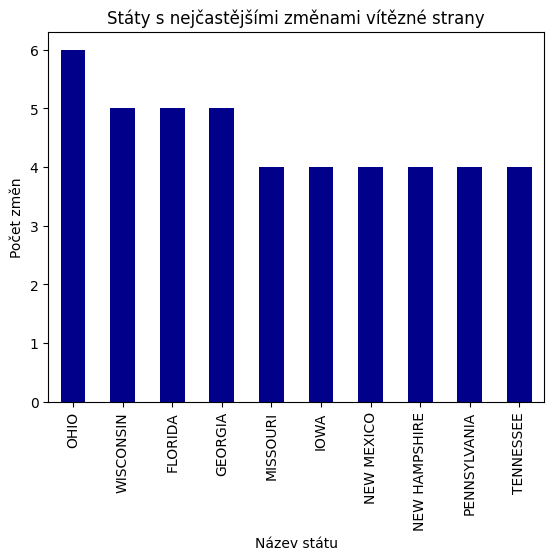

In [123]:
import matplotlib.pyplot as plt


data_pivot = data_pivot.iloc[:10]
data_pivot = data_pivot.set_index("state")
data_pivot["Change_party"].plot(kind="bar", color="darkblue", title="Státy s nejčastějšími změnami vítězné strany")
plt.ylabel("Počet změn")
plt.xlabel("Název státu")

### Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).


1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.

In [124]:
df_volby.head(15)

df_volby_2 = df_volby.sort_values(["state","year","Rank"])
df_volby_2 = df_volby_2.reset_index()
# df_volby_2["Previous_winner_party"] = df_volby_2["party_simplified"].shift(1)
df_volby_2["Second_candidatevotes"] = df_volby_2["candidatevotes"].shift(-1)
df_volby_2 = df_volby_2[df_volby_2["Rank"] == 1]
df_volby_2["Rozdil_hlasu"] = df_volby_2["candidatevotes"] - df_volby_2["Second_candidatevotes"]
df_volby_2.sort_values(["year","state"],inplace=True)
df_volby_2.to_csv("ukol_01-df_volby_2.csv")
df_volby_2.head(15)

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,Second_candidatevotes,Rozdil_hlasu
0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0
67,7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0
145,11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0
224,19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0
314,23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0
399,30,1976,COLORADO,CO,8,84,62,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,584278,1081440,20210113,NaN,REPUBLICAN,1.0,460801.0,123477.0
548,38,1976,CONNECTICUT,CT,9,16,1,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,719261,1386355,20210113,NaN,REPUBLICAN,1.0,647895.0,71366.0
624,43,1976,DELAWARE,DE,10,51,11,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,122461,235642,20210113,NaN,DEMOCRAT,1.0,109780.0,12681.0
707,50,1976,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,137818,168830,20210113,NaN,DEMOCRAT,1.0,27873.0,109945.0
794,55,1976,FLORIDA,FL,12,59,43,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,1636000,3150631,20210113,NaN,DEMOCRAT,1.0,1469531.0,166469.0


2. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.

In [125]:
df_volby_2["Relativni_rozdil"] = df_volby_2["Rozdil_hlasu"]/df_volby_2["totalvotes"]
display(df_volby_2)

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,Second_candidatevotes,Rozdil_hlasu,Relativni_rozdil
0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124
67,7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0,0.222514
145,11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0,0.165662
224,19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0,0.300574
314,23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0,0.017935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,4252,2020,VIRGINIA,VA,51,54,40,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2413568,4460524,20210113,NaN,DEMOCRAT,1.0,1962430.0,451138.0,0.101140
4061,4256,2020,WASHINGTON,WA,53,91,73,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2369612,4087631,20210113,NaN,DEMOCRAT,1.0,1584651.0,784961.0,0.192033
4118,4264,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN,1.0,235984.0,309398.0,0.389350
4210,4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT,1.0,1610184.0,20682.0,0.006271


3. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.

In [126]:
df_volby_2.sort_values("Relativni_rozdil", inplace=True)
df_volby_2

# nejtěsnější výsledek voleb byl v roce 2000 na Floridě (relativní rozdíl hlasů z celkového je 0,000090).

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Rank,Second_candidatevotes,Rozdil_hlasu,Relativni_rozdil
822,2106,2000,FLORIDA,FL,12,59,43,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,2912790,5963110,20210113,NaN,REPUBLICAN,1.0,2912253.0,537.0,0.000090
2696,2266,2000,NEW MEXICO,NM,35,85,66,US PRESIDENT,"GORE, AL",DEMOCRAT,False,286783,598605,20210113,NaN,DEMOCRAT,1.0,286417.0,366.0,0.000611
2236,2907,2008,MISSOURI,MO,29,43,34,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1445814,2925205,20210113,NaN,REPUBLICAN,1.0,1441911.0,3903.0,0.001334
1822,479,1980,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,1057631,2524090,20210113,NaN,REPUBLICAN,1.0,1053802.0,3829.0,0.001517
3152,241,1976,OREGON,OR,41,92,72,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,492120,1029876,20210113,NaN,REPUBLICAN,1.0,490407.0,1713.0,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2465,2004,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"KERRY, JOHN",DEMOCRAT,False,202970,227586,20210113,NaN,DEMOCRAT,1.0,21256.0,181714.0,0.798441
775,3130,2012,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,267070,293764,20210113,NaN,DEMOCRAT,1.0,21381.0,245689.0,0.836348
770,2785,2008,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,245800,265853,20210113,NaN,DEMOCRAT,1.0,17367.0,228433.0,0.859246
780,3460,2016,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,282830,312575,20210113,NaN,DEMOCRAT,1.0,12723.0,270107.0,0.864135


4. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [130]:
def to_swing(row):
    # if row["party_simplified"]== row["Previous_winner_party"]
    if df_volby_vitez_filtered[df_volby_vitez_filtered["party_simplified"]] == df_volby_vitez_filtered[df_volby_vitez_filtered["Previous_winner_party"]]:
       return "no swing"
    if df_volby_vitez_filtered.query("party_simplified = REPUBLICAN" and "Previous_winner_party = DEMOCRAT"):
       return "to Rep"
    if df_volby_vitez_filtered.query("party_simplified = DEMOCRAT" and "Previous_winner_party = REPUBLICAN"):
       return "to Dem"
    else:
       return "chyba"

df_volby_vitez_filtered["Swing"] = df_volby_vitez_filtered.apply(to_swing, axis=1)
df_volby_vitez_filtered

# if row[["body_aj", "body_mat", "body_cj"]].min() < 60:
#         return 0
# skore = row[["body_aj", "body_mat", "body_cj"]].sum()

KeyError: "None of [Index(['REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN',\n       'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN',\n       ...\n       'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN',\n       'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN', 'REPUBLICAN'],\n      dtype='object', length=611)] are in the [columns]"

In [132]:
def to_swing(row):
    row = row.iloc[15:]
    
    # if row.query("party_simplified" = DEMOCRAT" and "Previous_winner_party = REPUBLICAN"):
    #              return "to Dem"   # == "row["Previous_winner_party"]
    if row["party_simplified"] == "DEMOCRAT" & row["Previous_winner_party"] == "REPUBLICAN":
       return "to Dem"
    if row["party_simplified"] == "REPUBLICAN" & row["Previous_winner_party"] == "DEMOCRAT":
       return "to Rep"
    else:
       return "no_swing"
    
    
    
    #if df_volby_vitez_filtered[df_volby_vitez_filtered["party_simplified"]] == df_volby_vitez_filtered[df_volby_vitez_filtered["Previous_winner_party"]]:
    #   return "no swing"
    #if df_volby_vitez_filtered.query("party_simplified = REPUBLICAN" and "Previous_winner_party = DEMOCRAT"):
    #   return "to Rep"
    #if df_volby_vitez_filtered.query("party_simplified = DEMOCRAT" and "Previous_winner_party = REPUBLICAN"):
    #   return "to Dem"

df_volby_vitez_filtered["Swing"] = df_volby_vitez_filtered.apply(to_swing, axis=1)
df_volby_vitez_filtered

# if row[["body_aj", "body_mat", "body_cj"]].min() < 60:
#         return 0
# skore = row[["body_aj", "body_mat", "body_cj"]].sum()


# def prijat(row):
#     if row["poradi"] <= 30:
#         return "Ano"
#    else:
#         return "Ne"
# ...Zde je to pro názornost "Ano"/"Ne", ale jinak by se pro případné další zpracování spíš hodilo použít hodnoty True/False

# data["prijat"] = data.apply(prijat, axis=1)

TypeError: unsupported operand type(s) for &: 'str' and 'str'